In [1]:
import crosspower as cp
#import FisherCl as fcl # branch master
import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [2]:
myPkLin = cp.MatterPower(nonlinear=False)
myPkNL  = cp.MatterPower(nonlinear=True)
print 'done'

zs.size:  9998


zs.size:  9998
done


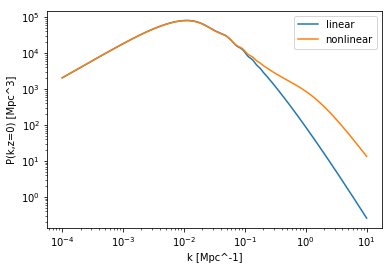

In [3]:
kSpectrum = np.logspace(-4,1,1000)
myZ = 0
PkLin = myPkLin.PK.P(myZ,kSpectrum)
PkNL  = myPkNL.PK.P(myZ,kSpectrum)
plt.loglog(kSpectrum,PkLin,label='linear')
plt.loglog(kSpectrum,PkNL,label='nonlinear')
plt.xlabel('k [Mpc^-1]')
plt.ylabel('P(k,z={0}) [Mpc^3]'.format(myZ))
plt.legend()
plt.show()

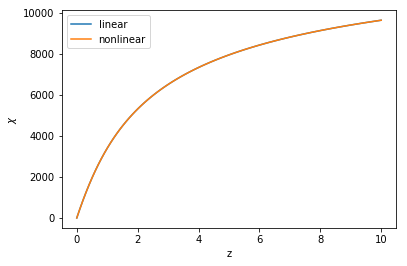

In [8]:
ChiOfZLin = myPkLin.getChiofZ()
ChiOfZNL = myPkNL.getChiofZ()
myZs = np.linspace(0,10,100)
plt.plot(myZs,ChiOfZLin(myZs),label='linear')
plt.plot(myZs,ChiOfZNL(myZs),label='nonlinear')
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$\chi$')
plt.show()

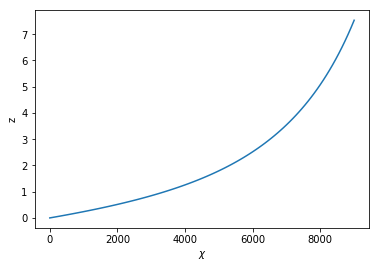

In [9]:
# make z(chi) function
from scipy.interpolate import interp1d

zs = np.hstack((  [0],myPkLin.zs,  myPkLin.zstar))
chis = np.hstack(([0],myPkLin.chis,myPkLin.chistar))
zOfChi = interp1d(chis,zs,kind='quadratic')

myChis = np.linspace(0,9000,100)
plt.plot(myChis,zOfChi(myChis),label='linear')
plt.ylabel('z')
plt.xlabel(r'$\chi$')
plt.show()

In [14]:
# define k(ell,chi) from Limber approximation
def kOfL(ell,chi):
    return (ell+1/2.)/chi
def LOfK(k,chi):
    return k*chi-1/2.
def chiOfLK(ell,k):
    return (ell+1/2.)/k

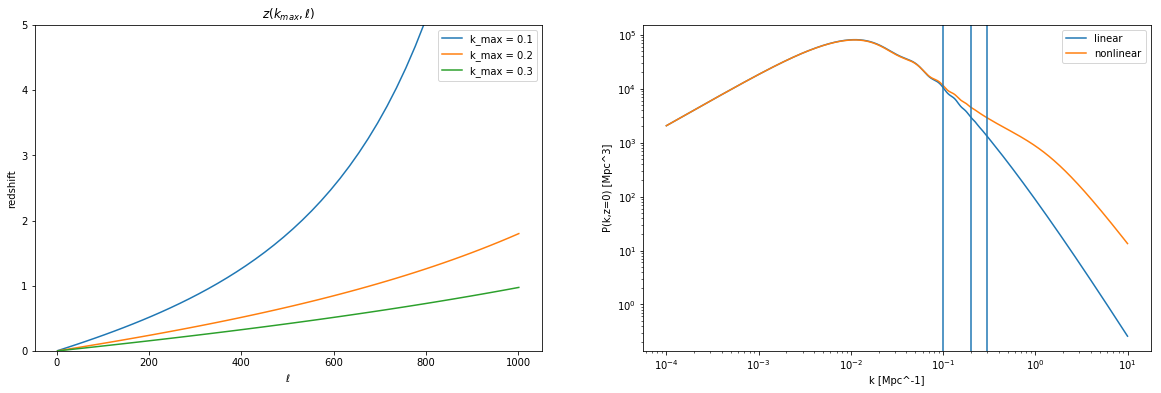

In [22]:
# pick some k_max values
myKs = [1e-1,2e-1,3e-1]

# pick a range of ell values
lmax = 1000
myElls = np.linspace(2,lmax+1)

#define z(k,l) for each k
myZs = []
for myK in myKs:
    myZs.append(zOfChi(chiOfLK(myElls,myK)))
    
# plot them
f, axarr = plt.subplots(1,2,figsize=(20,6))
plt.sca(axarr[0])
for i, myK in enumerate(myKs):
    plt.plot(myElls,myZs[i],label='k_max = {0}'.format(myK))
plt.xlabel(r'$\ell$')
plt.ylabel('redshift')
plt.title(r'$z(k_{max},\ell)$')
plt.ylim([0,5])
plt.legend()

plt.sca(axarr[1])
plt.loglog(kSpectrum,PkLin,label='linear')
plt.loglog(kSpectrum,PkNL,label='nonlinear')
plt.xlabel('k [Mpc^-1]')
plt.ylabel('P(k,z={0}) [Mpc^3]'.format(myZ))

for i, myK in enumerate(myKs):
    plt.axvline(x=myK)

plt.legend()

plt.show()
